<a href="https://colab.research.google.com/github/SSNEGI05/Time_series/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

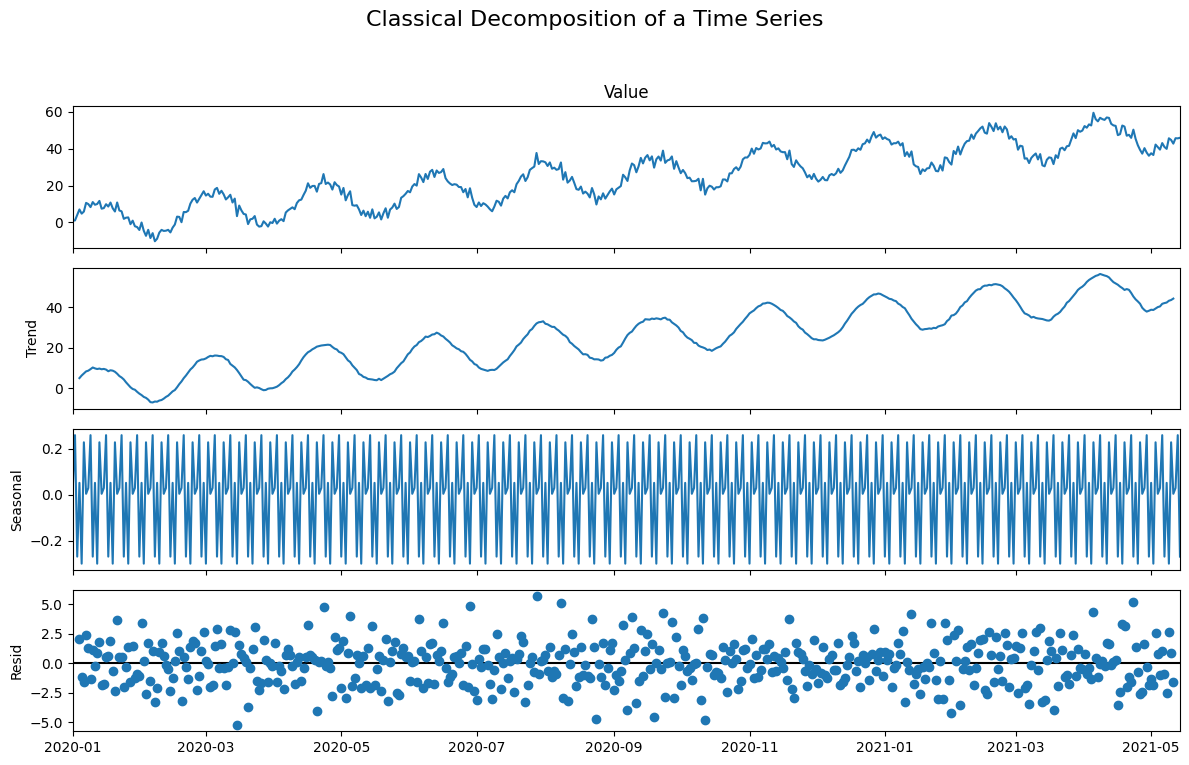


Cell 1 complete. Can you see the clear Trend and Seasonality separated from the Residual (Noise)?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Setup: Creating a synthetic time series
np.random.seed(42)
time = np.arange(0, 500)

# Components:
trend = 0.1 * time                                 # Linear upward trend
seasonality = 10 * np.sin(2 * np.pi * time / 50)   # Periodic wave (cycle of 50)
noise = np.random.normal(0, 2, 500)                # Irregular/Random noise

# The observed Series (Yt = Tt + St + noise)
series = trend + seasonality + noise

# 2. Putting it into a DataFrame
df = pd.DataFrame({'Value': series}, index=pd.date_range(start='2020-01-01', periods=500, freq='D'))

# 3. Classical Decomposition
result = seasonal_decompose(df['Value'], model='additive')

# 4. Plotting
plt.rcParams['figure.figsize'] = (12, 8)
result.plot()
plt.suptitle('Classical Decomposition of a Time Series', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nCell 1 complete. Can you see the clear Trend and Seasonality separated from the Residual (Noise)?")

Testing and Transforming for Stationarity

--- ADF Test for: Raw Series (with Trend) ---
ADF Statistic: -1.5186
p-value: 0.5243
Result: Non-Stationary (Fail to reject H0)
------------------------------
--- ADF Test for: Differenced Series ---
ADF Statistic: -8.2990
p-value: 0.0000
Result: Stationary (Reject H0)
------------------------------


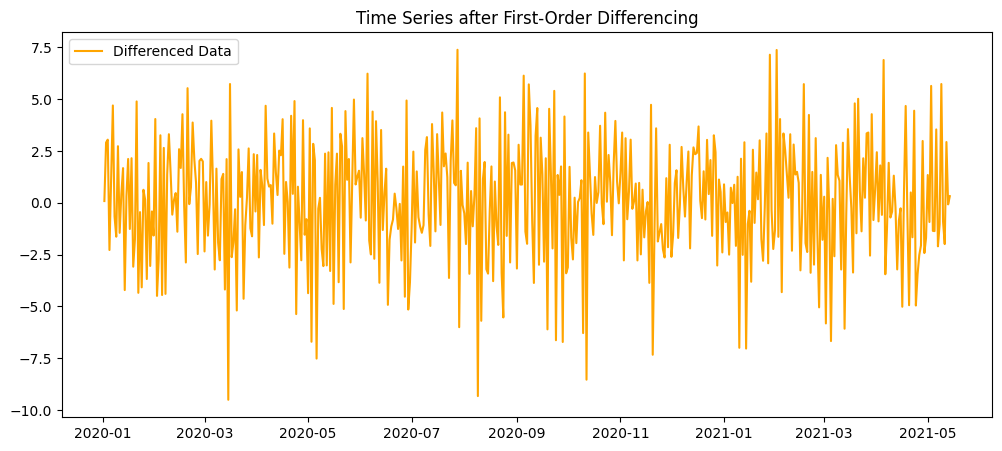

In [ ]:
from statsmodels.tsa.stattools import adfuller

# 1. Define a function to print ADF results clearly
def check_stationarity(series, name):
    print(f"--- ADF Test for: {name} ---")
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Result: Stationary (Reject H0)")
    else:
        print("Result: Non-Stationary (Fail to reject H0)")
    print("-" * 30)

# 2. Test the original series (which has a trend)
check_stationarity(df['Value'], "Raw Series (with Trend)")

# 3. Transform: First-Order Differencing (Yt - Yt-1)
# This removes the trend to help make it stationary
df['Diff_Value'] = df['Value'].diff().dropna()

# 4. Test the differenced series
check_stationarity(df['Diff_Value'].dropna(), "Differenced Series")

# 5. Visualization of the transformation
plt.figure(figsize=(12, 5))
plt.plot(df['Diff_Value'], color='orange', label='Differenced Data')
plt.title('Time Series after First-Order Differencing')
plt.legend()
plt.show()

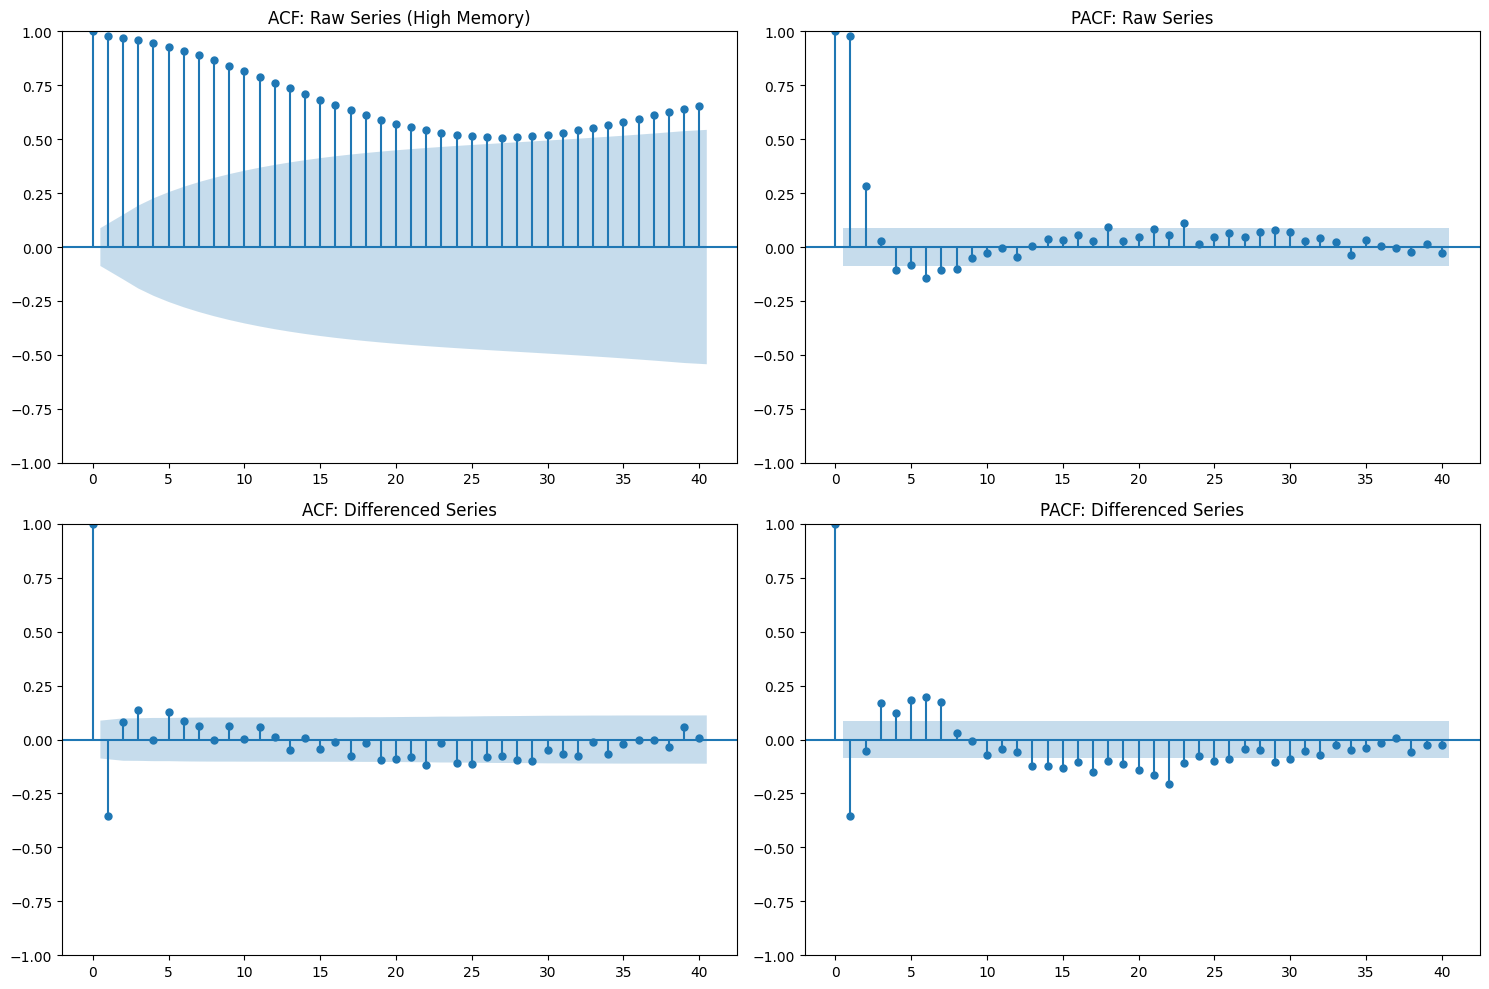

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Setup the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 2. Plot ACF and PACF for the RAW series (Non-Stationary)
# Parameters:
# - lags: How many past time steps to look back (we'll look at 40 days)
# - ax: Which subplot to use
plot_acf(df['Value'], lags=40, ax=axes[0, 0], title="ACF: Raw Series (High Memory)")
plot_pacf(df['Value'], lags=40, ax=axes[0, 1], title="PACF: Raw Series")

# 3. Plot ACF and PACF for the DIFFERENCED series (Stationary)
# We use .dropna() because the first value of a differenced series is NaN
plot_acf(df['Diff_Value'].dropna(), lags=40, ax=axes[1, 0], title="ACF: Differenced Series")
plot_pacf(df['Diff_Value'].dropna(), lags=40, ax=axes[1, 1], title="PACF: Differenced Series")

plt.tight_layout()
plt.show()